In [112]:
import numpy as jnp
from matplotlib import pyplot as plt

In [282]:
eps = 1e-3

theta = jnp.linspace(-jnp.pi/2, jnp.pi/2)

theta_r = jnp.linspace(-jnp.pi/2, -jnp.sqrt(eps))
theta_n = jnp.linspace(-jnp.sqrt(eps), jnp.sqrt(eps))
theta_l = jnp.linspace(jnp.sqrt(eps), jnp.pi/2)

E = -jnp.sin(2*theta)
grad_r = -2*jnp.cos(2*theta_r)
grad = -2*jnp.cos(2*theta)
grad_l = -2*jnp.cos(2*theta_l)

In [283]:
def calc_mc_grad(theta):
    return jnp.where(theta**2 > eps, -2*jnp.cos(2*theta), -theta**4)

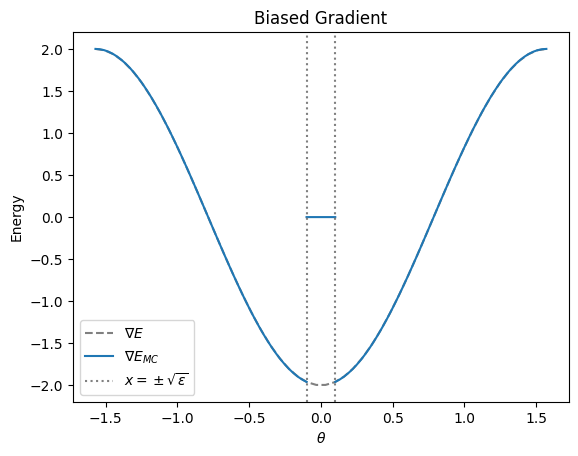

In [281]:
# plt.plot(theta, E, label = "Energy")
plt.plot(theta, grad, linestyle= "dashed", color = "gray", label = "$\\nabla E$")
plt.plot(theta_r, grad_r, color = "C0", label = "$\\nabla E_{MC}$")
plt.plot(theta_n, -theta_n**4, color = "C0")
plt.plot(theta_l, grad_l, color = "C0")

plt.axvline(-jnp.sqrt(eps), color = "gray", linestyle = "dotted", label = "$x = \\pm \\sqrt{\epsilon}$")
plt.axvline(jnp.sqrt(eps), color = "gray", linestyle = "dotted")
plt.xlabel("$\\theta$")
plt.ylabel("Energy")
plt.legend()
plt.title("Biased Gradient")

plt.savefig("../plots/zero_problem_gradient_2d.pdf")

### Gradient Updates

In [284]:
def get_trajectory(dt = 1e-5):
    theta = -jnp.pi/8
    N = int(100/dt)
    t = jnp.arange(N)*dt
    hist = jnp.zeros(N)
    hist[0] = theta

    for i in range(1, N):
        theta = theta - dt * calc_mc_grad(theta)
        hist[i] = theta

    return t, hist

In [285]:
dts = 10**(jnp.linspace(-3, -0.4, num = 50))
thetas = jnp.zeros_like(dts)
for i ,dt in enumerate(dts):
    thetas[i] = get_trajectory(dt = dt)[1][-1]


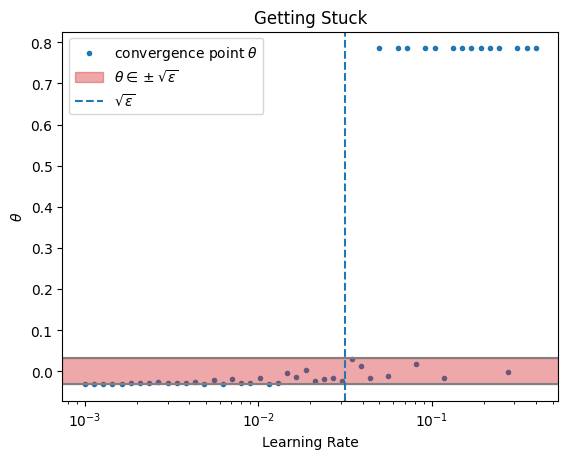

In [287]:
plt.scatter(dts, thetas, marker = ".", label = "convergence point $\\theta$")

plt.axhline(-jnp.sqrt(eps), color = "gray")
plt.axhline(+jnp.sqrt(eps), color = "gray")
plt.axhspan(-jnp.sqrt(eps), jnp.sqrt(eps), color = "C3", alpha = 0.4, label = "$\\theta \\in \\pm \\sqrt{\\epsilon}$")

plt.axvline(jnp.sqrt(eps), linestyle = "dashed", label = "$\\sqrt{\\epsilon}$")
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("$\\theta$")

plt.legend()
plt.title("Getting Stuck")
plt.savefig("../plots/zero_problem_convergence_2d.pdf")

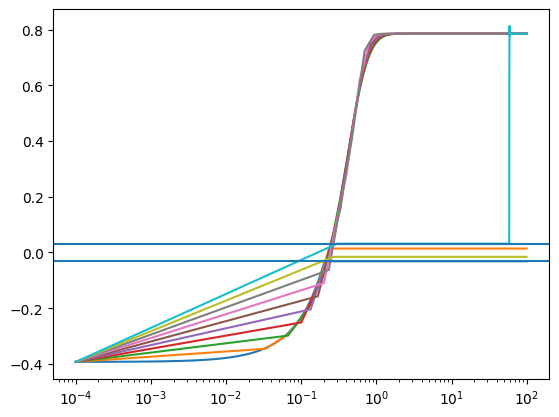

In [267]:
for dt in jnp.linspace(1e-3, 0.3, num = 10):
    t, theta = get_trajectory(dt = dt)
    plt.plot(t + 1e-4, theta)

plt.axhline(-jnp.sqrt(eps))
plt.axhline(+jnp.sqrt(eps))
plt.xscale("log")